In [12]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
ticker = "AAPL"
df = yf.download(ticker, start="2019-01-01", end="2022-01-01")

df



[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.845039,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.075397,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.530048,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.450970,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.126762,164101200
...,...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,178.065659,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.038681,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,177.127563,62348900


In [34]:
# calculate short term MA
short_window_size = 20  # Example window size (20 days)
df['short_MA'] = df['Close'].rolling(window=short_window_size).mean()


In [35]:
# calculate long term MA
long_window_size = 100  # Example window size (20 days)
df['long_MA'] = df['Close'].rolling(window=long_window_size).mean()

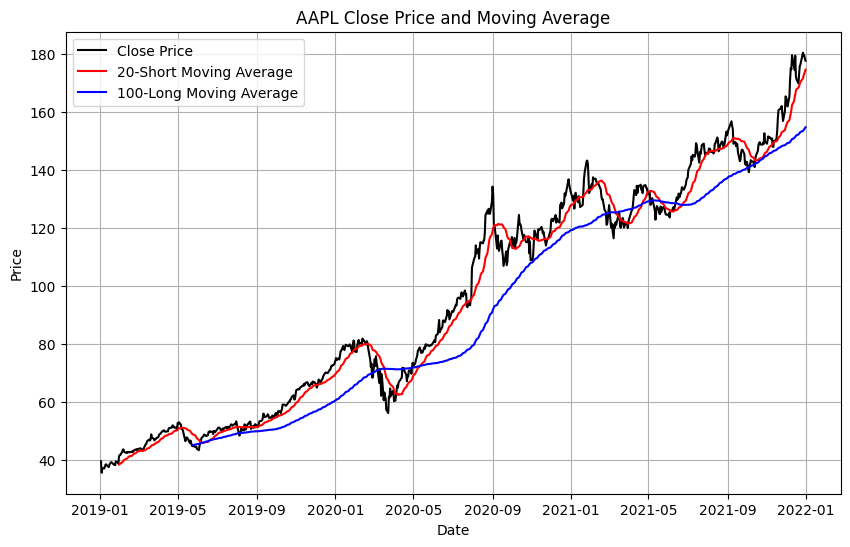

In [36]:
# plot

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='black')
plt.plot(df.index, df['short_MA'], label=f'{short_window_size}-Short Moving Average', color='red')
plt.plot(df.index, df['long_MA'], label=f'{long_window_size}-Long Moving Average', color='blue')

plt.title(f'{ticker} Close Price and Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Find intersections (crossings) between short and long moving averages
df['Signal'] = 0
df['Signal'][short_window_size:] = \
    np.where(data['Short_MA'][short_window_size:] > data['Long_MA'][short_window_size:], 1, 0)
data['Position'] = data['Signal'].diff()